In [1]:
import scipy.odr as odr
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 8, 8
matplotlib.rcParams['font.size'] = 15

In [2]:
rc = Table.read('../rcall_match.txt', format='ascii')
x1 = rc['TEFF']
x2 = rc['nuv_mag']-rc['phot_g_mean_mag']
x3 = (rc['nuv_mag']-rc['ebv']*7.24)-(rc['phot_g_mean_mag']-rc['ebv']*3.303)

y = rc['FE_H']
z1 = np.polyfit(x1, y, 2)
z2 = np.polyfit(x2, y, 2)
z3 = np.polyfit(x3, y, 2)

xp1 = np.linspace(np.min(x1), np.max(x1), len(x1))
xp2 = np.linspace(np.min(x2), np.max(x2), len(x2))
xp3 = np.linspace(np.min(x3), np.max(x3), len(x3))

# Separating thin vs thick disk
m = (0.095-.21)/(0+0.8)
b = 0.095
thick, = np.where((rc['ALPHAFE'] > 0.08) & (rc['ALPHAFE'] > (m*rc['FE_H'] + b)))
thin, = np.where((rc['ALPHAFE'] < 0.08) | (rc['ALPHAFE'] < (m*rc['FE_H'] + b)))

    print z1

[  3.81492572e-08  -1.56620459e-03   6.57140985e+00]


In [ ]:
fit, cvm, info = linfit(x1, y, sigmax=np.n)

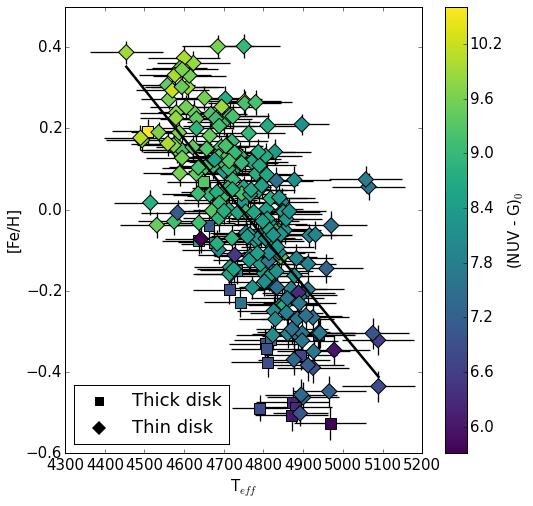

In [19]:
plt.scatter(x1[thick], y[thick], c=x3[thick], s=120, marker='s', cmap=viridis, label='Thick disk')
plt.errorbar(x1[thick], y[thick], xerr=rc['TEFF_ERR'][thick], yerr=rc['FE_H_ERR'][thick], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
plt.scatter(x1[thin], y[thin], c=x3[thin], s=120, marker='D', cmap=viridis, label='Thin disk')
plt.errorbar(x1[thin], y[thin], xerr=rc['TEFF_ERR'][thin], yerr=rc['FE_H_ERR'][thin], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
plt.plot(xp1, z1[0]*xp1**2 + z1[1]*xp1 + z1[2], linewidth=2.5, c='black', zorder=10)
plt.xlabel('T$_{eff}$')
plt.ylabel('[Fe/H]')
plt.colorbar().set_label('(NUV - G)$_0$')
plt.xlim(4300, 5200)
plt.ylim(-0.6, 0.5)

leg = plt.legend(scatterpoints=1, loc=3)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[0]._sizes = [80]
leg.legendHandles[1]._sizes = [80]

plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


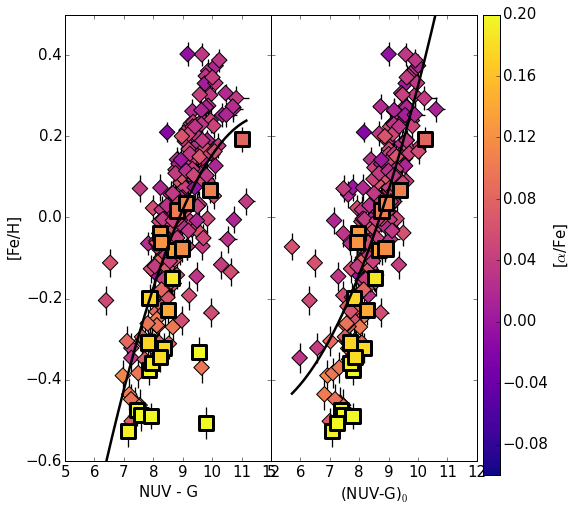

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

cmap = ax1.scatter((rc['nuv_mag']-rc['phot_g_mean_mag'])[thin], rc['FE_H'][thin], c=rc['ALPHAFE'][thin], s=120, vmin=-0.1, vmax=0.2, marker='D', cmap=plasma, **{"zorder":5})
ax1.errorbar((rc['nuv_mag']-rc['phot_g_mean_mag'])[thin], rc['FE_H'][thin], xerr=(rc['nuv_magerr']-rc['Gerr'])[thin], yerr=rc['FE_H_ERR'][thin], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
ax1.scatter((rc['nuv_mag']-rc['phot_g_mean_mag'])[thick], rc['FE_H'][thick], c=rc['ALPHAFE'][thick], s=200, vmin=-0.1, vmax=0.2, marker='s', linewidth=3, cmap=plasma,**{"zorder":5})
ax1.errorbar((rc['nuv_mag']-rc['phot_g_mean_mag'])[thick], rc['FE_H'][thick], xerr=(rc['nuv_magerr']-rc['Gerr'])[thick], yerr=rc['FE_H_ERR'][thick], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
ax1.plot(xp2, z2[0]*xp2**2 + z2[1]*xp2 + z2[2], linewidth=2.5, c='black', zorder=10)

ax2.scatter(((rc['nuv_mag']-rc['ebv']*7.24)-(rc['phot_g_mean_mag']-rc['ebv']*3.303))[thin], rc['FE_H'][thin], c=rc['ALPHAFE'][thin], s=120, label='Thin disk', vmin=-0.1, vmax=0.2, marker='D', cmap=plasma, **{"zorder":5})
ax2.errorbar(((rc['nuv_mag']-rc['ebv']*7.24)-(rc['phot_g_mean_mag']-rc['ebv']*3.303))[thin], rc['FE_H'][thin], xerr=(rc['nuv_magerr']-rc['Gerr'])[thin], yerr=rc['FE_H_ERR'][thin], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
ax2.scatter(((rc['nuv_mag']-rc['ebv']*7.24)-(rc['phot_g_mean_mag']-rc['ebv']*3.303))[thick], rc['FE_H'][thick], c=rc['ALPHAFE'][thick], s=200, label='Thick disk', vmin=-0.1, vmax=0.2, marker='s', linewidth=3, cmap=plasma, **{"zorder":5})
ax2.errorbar(((rc['nuv_mag']-rc['ebv']*7.24)-(rc['phot_g_mean_mag']-rc['ebv']*3.303))[thick], rc['FE_H'][thick], xerr=(rc['nuv_magerr']-rc['Gerr'])[thick], yerr=rc['FE_H_ERR'][thick], ecolor='black', fmt=None, marker=None, mew=0, elinewidth=1.3, **{"zorder":0})
ax2.plot(xp3, z3[0]*xp3**2 + z3[1]*xp3 + z3[2], linewidth=2.5, c='black', zorder=10)

'''ax2.scatter(x2, y, c=rc['ALPHAFE'], vmin=-0.1, vmax=.2, s=120)
#ax1.plot(xp2, z2[0]*xp2**2 + z2[1]*xp2 + z2[2])
ax2.plot(xp2, z2[0]*xp2 + z2[1])

cmap = ax1.scatter(x3, y, c=rc['ALPHAFE'], vmin=-0.1, vmax=.2, s=120)
#ax2.plot(xp3, z3[0]*xp3**2 + z3[1]*xp3 + z3[2])
ax1.plot(xp3, z3[0]*xp3 + z3[1])

'''
ax1.set_xlim(5, 12)
ax1.set_ylim(-.6, .5)
ax1.set_xlabel('NUV - G')
ax2.set_xlim(5,12)
ax2.set_ylim(-.6, .5)
ax2.set_xlabel('(NUV-G)$_0$')
ax1.set_ylabel('[Fe/H]')
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(right=.84)
cbar_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
fig.colorbar(cmap, cax=cbar_ax).set_label(r'[$\alpha$/Fe]')

plt.show()